In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.

import warnings
warnings.filterwarnings("ignore")

data=pd.read_excel("proje.xlsx")
df=data.copy()
df.head()

,Il,Bolge,Enlem,Boylam,Nufus,orman_hektar,Arac_sayısı,Ortalama_Hava_kalitesi(PM10,konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton),elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton),...,Atıktan_kaynaklanan_azot(ton),Tarımdan_kaynaklanan_karbon(ton),Binalardan_kaynaklanan_karbon(ton),Ormancılık_ve_arazi_kullanımı(ton),Fosil_yakıttan_kaynaklanan_karbon(ton),Uretimden_kaynaklanan_karbon(ton),Maden_cıkartmaktan_kaynaklanan_karbon(ton),Enerjiden_kaynaklanan_karbon(ton),Ulastırmadan_kayanaklanan_karbon(ton),Atıktan_kaynaklanan_karbon(ton)
0,Adana,Akdeniz,3698542.0,3532502.0,2280484,593660,896419,48.89,1.38M t,16.72M t,...,582.50 t,147.20K t,1.49M t,359.33K t,203.36K t,1.40M t,26.06K t,16.72M t,3.24M t,51.50 t
1,Adıyaman,Güneydoğu Anadolu,37762990.0,38277298.0,611037,159234,151123,30.65,654.78K t,68.03K t,...,158.25 t,48.25K t,681.34K t,-134.49K t,32.61K t,717.66K t,4.86K t,68.03K t,772.97K t,15.32 t
2,Afyonkarahisar,Ege,38756217.0,30537846.0,750193,279300,295788,33.63,716.61K t,296.97K t,...,180.52 t,116.10K t,786.37K t,-1.79M t,106.56K t,697.50K t,9.85K t,296.97K t,1.46M t,17.31 t
3,Ağrı,Doğu Anadolu,39718993.0,43047663.0,499801,5320,34565,65.32,673.93K t,34.64K t,...,146.89 t,67.91K t,678.03K t,-118.50K t,33.78K t,692.59K t,5.04K t,34.64K t,623.09K t,14.84 t
4,Amasya,Karadeniz,40656314.0,35837068.0,342378,220681,153419,34.12,369.47K t,28.31K t,...,84.71 t,70.07K t,394.78K t,-1.29M t,39.15K t,296.46K t,4.12K t,28.31K t,577.68K t,8.56 t


In [21]:
df.tail()

,Il,Bolge,Enlem,Boylam,Nufus,orman_hektar,Arac_sayısı,Ortalama_Hava_kalitesi(PM10,konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton),elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton),...,Atıktan_kaynaklanan_azot(ton),Tarımdan_kaynaklanan_karbon(ton),Binalardan_kaynaklanan_karbon(ton),Ormancılık_ve_arazi_kullanımı(ton),Fosil_yakıttan_kaynaklanan_karbon(ton),Uretimden_kaynaklanan_karbon(ton),Maden_cıkartmaktan_kaynaklanan_karbon(ton),Enerjiden_kaynaklanan_karbon(ton),Ulastırmadan_kayanaklanan_karbon(ton),Atıktan_kaynaklanan_karbon(ton)
76,Yalova,Marmara,40657659.0,29268905.0,307882,47570,91688,NaN,204.79K t,660.11K t,...,68.58 t,1.81K t,230.63K,47.81K t,13.39K t,163.89K t,2.00K t,660.11K t,429.12K t,6.29 t
77,Karabük,Karadeniz,41200069.0,32629601.0,250478,287761,79895,39.14,245.53K t,522.01K t,...,122.12 t,25.32K t,274.20K t,351.04K t,17.71K t,5.50M t,2.64K t,522.01K t,320.28K t,6.26 t
78,Kilis,Güneydoğu Anadolu,36717999.0,37116901.0,156739,27032,67015,59.00,146.50K t,12.43K t,...,47.50 t,13.21K t,152.59K t,-17.38K t,12.12K t,134.63K t,1.81K t,12.43K t,248.53K t,4.80 t
79,Osmaniye,Akdeniz,37074695.0,36246347.0,561061,158679,229225,101.86,435.54K t,25.93K t,...,178.11 t,30.47K t,452.02K t,91.13K t,25.28K t,296.14K t,3.77K t,25.93K t,737.32K t,13.07 t
80,Düzce,Karadeniz,40839377.0,31159454.0,412344,133203,149012,47.05,341.35K t,21.43K t,...,149.41 t,11.54K t,383.38K t,488.48K t,20.90K t,314.25K t,3.12K t,21.43K t,657.93K t,10.07 t


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 38 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Il                                                                     81 non-null     object 
 1   Bolge                                                                  81 non-null     object 
 2   Enlem                                                                  81 non-null     float64
 3   Boylam                                                                 81 non-null     float64
 4   Nufus                                                                  81 non-null     int64  
 5   orman_hektar                                                           81 non-null     int64  
 6   Arac_sayısı                                                            81 non-null     int64

In [23]:
df.drop(["Sütun1"],inplace=True,axis=1)

In [24]:
df = df.applymap(lambda x: str(x).replace(' t', '').replace('t', '') if isinstance(x, str) and pd.notna(x) else x)

In [25]:
df.head()

,Il,Bolge,Enlem,Boylam,Nufus,orman_hektar,Arac_sayısı,Ortalama_Hava_kalitesi(PM10,konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton),elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton),...,Atıktan_kaynaklanan_azot(ton),Tarımdan_kaynaklanan_karbon(ton),Binalardan_kaynaklanan_karbon(ton),Ormancılık_ve_arazi_kullanımı(ton),Fosil_yakıttan_kaynaklanan_karbon(ton),Uretimden_kaynaklanan_karbon(ton),Maden_cıkartmaktan_kaynaklanan_karbon(ton),Enerjiden_kaynaklanan_karbon(ton),Ulastırmadan_kayanaklanan_karbon(ton),Atıktan_kaynaklanan_karbon(ton)
0,Adana,Akdeniz,3698542.0,3532502.0,2280484,593660,896419,48.89,1.38M,16.72M,...,582.50,147.20K,1.49M,359.33K,203.36K,1.40M,26.06K,16.72M,3.24M,51.50
1,Adıyaman,Güneydoğu Anadolu,37762990.0,38277298.0,611037,159234,151123,30.65,654.78K,68.03K,...,158.25,48.25K,681.34K,-134.49K,32.61K,717.66K,4.86K,68.03K,772.97K,15.32
2,Afyonkarahisar,Ege,38756217.0,30537846.0,750193,279300,295788,33.63,716.61K,296.97K,...,180.52,116.10K,786.37K,-1.79M,106.56K,697.50K,9.85K,296.97K,1.46M,17.31
3,Ağrı,Doğu Anadolu,39718993.0,43047663.0,499801,5320,34565,65.32,673.93K,34.64K,...,146.89,67.91K,678.03K,-118.50K,33.78K,692.59K,5.04K,34.64K,623.09K,14.84
4,Amasya,Karadeniz,40656314.0,35837068.0,342378,220681,153419,34.12,369.47K,28.31K,...,84.71,70.07K,394.78K,-1.29M,39.15K,296.46K,4.12K,28.31K,577.68K,8.56


In [26]:
def convert_mk(value):
    if pd.isna(value):  # NaN ise dokunma
        return value
    if isinstance(value, str):
        value = value.strip()
        if value.endswith('M'):
            return float(value.replace('M', '')) * 1_000_000
        elif value.endswith('K'):
            return float(value.replace('K', '')) * 1_000
    return value

# Tüm DataFrame'e uygula
df = df.applymap(convert_mk)

In [27]:
df.head()

,Il,Bolge,Enlem,Boylam,Nufus,orman_hektar,Arac_sayısı,Ortalama_Hava_kalitesi(PM10,konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton),elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton),...,Atıktan_kaynaklanan_azot(ton),Tarımdan_kaynaklanan_karbon(ton),Binalardan_kaynaklanan_karbon(ton),Ormancılık_ve_arazi_kullanımı(ton),Fosil_yakıttan_kaynaklanan_karbon(ton),Uretimden_kaynaklanan_karbon(ton),Maden_cıkartmaktan_kaynaklanan_karbon(ton),Enerjiden_kaynaklanan_karbon(ton),Ulastırmadan_kayanaklanan_karbon(ton),Atıktan_kaynaklanan_karbon(ton)
0,Adana,Akdeniz,3698542.0,3532502.0,2280484,593660,896419,48.89,1380000.0,16720000.0,...,582.50,147200.0,1490000.0,359330.0,203360.0,1400000.0,26060.0,16720000.0,3240000.0,51.50
1,Adıyaman,Güneydoğu Anadolu,37762990.0,38277298.0,611037,159234,151123,30.65,654780.0,68030.0,...,158.25,48250.0,681340.0,-134490.0,32610.0,717660.0,4860.0,68030.0,772970.0,15.32
2,Afyonkarahisar,Ege,38756217.0,30537846.0,750193,279300,295788,33.63,716610.0,296970.0,...,180.52,116100.0,786370.0,-1790000.0,106560.0,697500.0,9850.0,296970.0,1460000.0,17.31
3,Ağrı,Doğu Anadolu,39718993.0,43047663.0,499801,5320,34565,65.32,673930.0,34640.0,...,146.89,67910.0,678030.0,-118500.0,33780.0,692590.0,5040.0,34640.0,623090.0,14.84
4,Amasya,Karadeniz,40656314.0,35837068.0,342378,220681,153419,34.12,369470.0,28310.0,...,84.71,70070.0,394780.0,-1290000.0,39150.0,296460.0,4120.0,28310.0,577680.0,8.56


In [28]:
int_colum=[
  'Ormanlık_Alanlar_Net_CO₂_Yutumu(ton)', 'bina_sektörü_toplam_emisyon_methan',
    'Tarımdan _kaynaklanan_methan_emisyon_miktarı','Ormancılık_ve_arazi_kullanımını_methan(ton)',
    'Fosil_yakıttan_kaynaklanan_methan(ton)','İmalattan_kaynaklanan_methan(ton)',
    'Mineral_çikartmadan_kaynaklanan_methan(ton)','Enerji_Kaynaklanandan_methan(ton)',
    'Ulastırmadan_Kaynaklanan_methan(ton)','Atıktan_kaynaklanan_methan(ton)',
    'Atık_yakma_ve_acıkta_yakmadan_kaynaklanan_CO2','Tarımdan_kaynaklanan_azot(ton)',
    'Binalardan_kaynaklanan_azot(ton)','imalattan_kaynaklanan_azot(ton)',
    'mineral_Cıkarmadan_kaynaklanan_azot(ton)','Enerjiden_kaynanaklan_azot(ton)',
    'ulastırma_kaynaklanan_azot(ton)','Atıktan_kaynaklanan_azot(ton)','konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton)',
    'Tarımdan_kaynaklanan_karbon(ton)','Binalardan_kaynaklanan_karbon(ton)','Ormancılık_ve_arazi_kullanımı(ton)', 'Atıktan_kaynaklanan_karbon(ton)'
]
for col in int_colum:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

In [29]:
df.dtypes

Il                                                                        object
Bolge                                                                     object
Enlem                                                                    float64
Boylam                                                                   float64
Nufus                                                                      int64
orman_hektar                                                               int64
Arac_sayısı                                                                int64
Ortalama_Hava_kalitesi(PM10                                              float64
konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton)    float64
elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton)              float64
Ormanlık_Alanlar_Net_CO₂_Yutumu(ton)                                     float64
bina_sektörü_toplam_emisyon_methan                                       float64
Tarımdan _kaynaklanan_methan

In [30]:
df.isna().sum()

Il                                                                       0
Bolge                                                                    0
Enlem                                                                    0
Boylam                                                                   0
Nufus                                                                    0
orman_hektar                                                             0
Arac_sayısı                                                              0
Ortalama_Hava_kalitesi(PM10                                              1
konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton)    2
elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton)              2
Ormanlık_Alanlar_Net_CO₂_Yutumu(ton)                                     2
bina_sektörü_toplam_emisyon_methan                                       2
Tarımdan _kaynaklanan_methan_emisyon_miktarı                             2
Ormancılık_ve_arazi_kulla

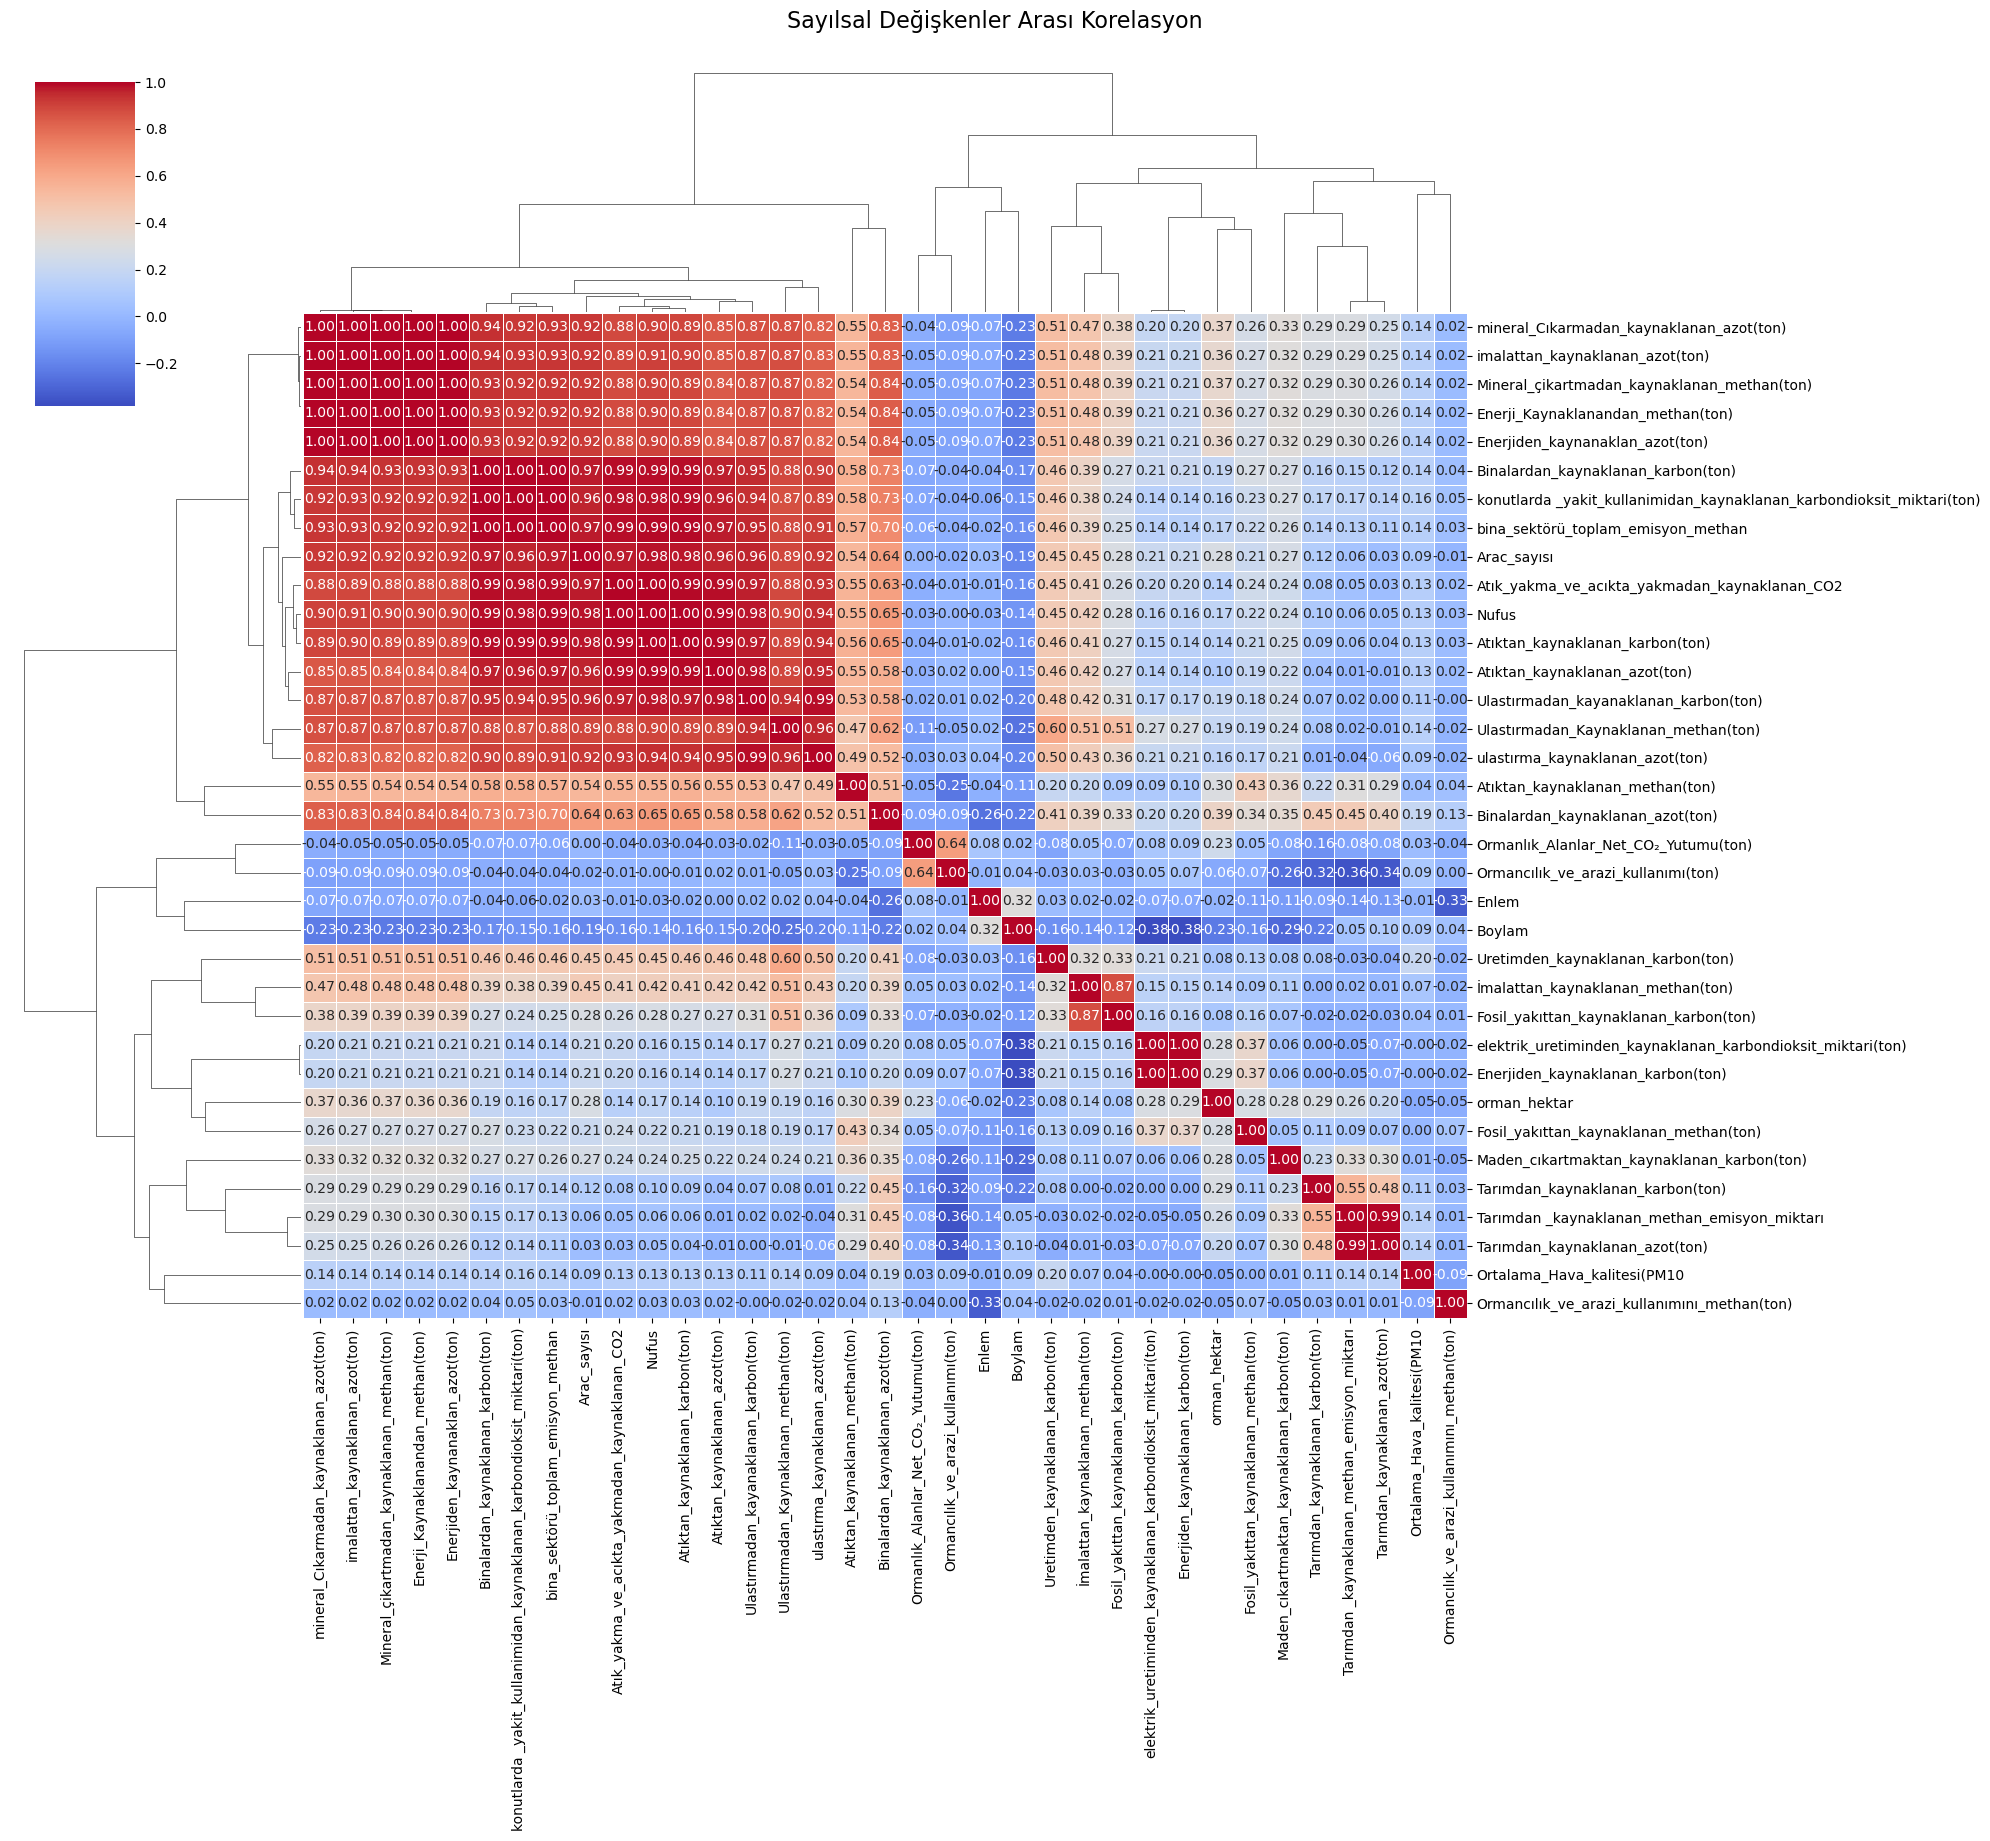

In [31]:
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini oluştur
corr_matrix = numeric_df.corr()

# Büyük ve okunabilir clustermap oluştur
sns.clustermap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    figsize=(20, 18) 
)

# Başlık eklemek için plt.title() değil, matplotlib fig nesnesi kullanmalıyız:
plt.suptitle("Sayılsal Değişkenler Arası Korelasyon", fontsize=16, y=1.02)
plt.show()

In [32]:
# Bölge ve İl sütunlarını yedekle
bolge_il_df = df[["Il", "Bolge"]]

# Sadece sayısal sütunları al
numeric_data = df.select_dtypes(include=["number"])

# Eksik verileri tahmin et
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterative_imputer = IterativeImputer(random_state=0)
iterative_array = iterative_imputer.fit_transform(numeric_data)
iterative_imputed_df = pd.DataFrame(iterative_array, columns=numeric_data.columns)

# Sayısal sütunları güncelle
df[numeric_data.columns] = iterative_imputed_df

# Il ve Bolge sütunlarını tekrar ekle
df["Il"] = bolge_il_df["Il"]
df["Bolge"] = bolge_il_df["Bolge"]

# Yeni dosya olarak kaydet
df.to_excel("proje_duzenlenmis.xlsx", index=False)

In [33]:
df.isna().sum()

Il                                                                       0
Bolge                                                                    0
Enlem                                                                    0
Boylam                                                                   0
Nufus                                                                    0
orman_hektar                                                             0
Arac_sayısı                                                              0
Ortalama_Hava_kalitesi(PM10                                              0
konutlarda _yakit_kullanimidan_kaynaklanan_karbondioksit_miktari(ton)    0
elektrik_uretiminden_kaynaklanan_karbondioksit_miktari(ton)              0
Ormanlık_Alanlar_Net_CO₂_Yutumu(ton)                                     0
bina_sektörü_toplam_emisyon_methan                                       0
Tarımdan _kaynaklanan_methan_emisyon_miktarı                             0
Ormancılık_ve_arazi_kulla